# 📓 Clustering Analysis of Berries
In this part, we will use clustering algorithms to group the berries based on their characteristics. 
This will help in understanding the natural groupings and diversity of the berries on the island.
A successful outcome will be well-separated clusters that reveal the underlying structure of the data, potentially corresponding to different species or variants of plants on the island.

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import scipy.cluster.hierarchy as shc


In [3]:
# load dataset & convert to dataframe

df_clustering = pd.read_json("../data/clustering.json")

### Data Undertsanding



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           500 non-null    float64
 1   leaf_size     500 non-null    float64
 2   berry_size    500 non-null    float64
 3   petal_size    500 non-null    float64
 4   soil_quality  500 non-null    float64
 5   height        500 non-null    float64
dtypes: float64(6)
memory usage: 23.6 KB

Dataset Head:
        age  leaf_size  berry_size  petal_size  soil_quality      height
0  9.795552  16.083941    8.734281    1.962667      3.362384  397.119296
1  8.596144  17.515386   10.270547    5.170076      5.948337  299.475406
2  9.446874  15.677807    7.777643    3.996334      4.888970  192.531378
3  7.342407  13.285620    8.435157    2.483346      3.221025  127.481779
4  8.103198  14.996667    8.351162    2.427108      3.199550  154.036470

Dataset Description:
              age   l

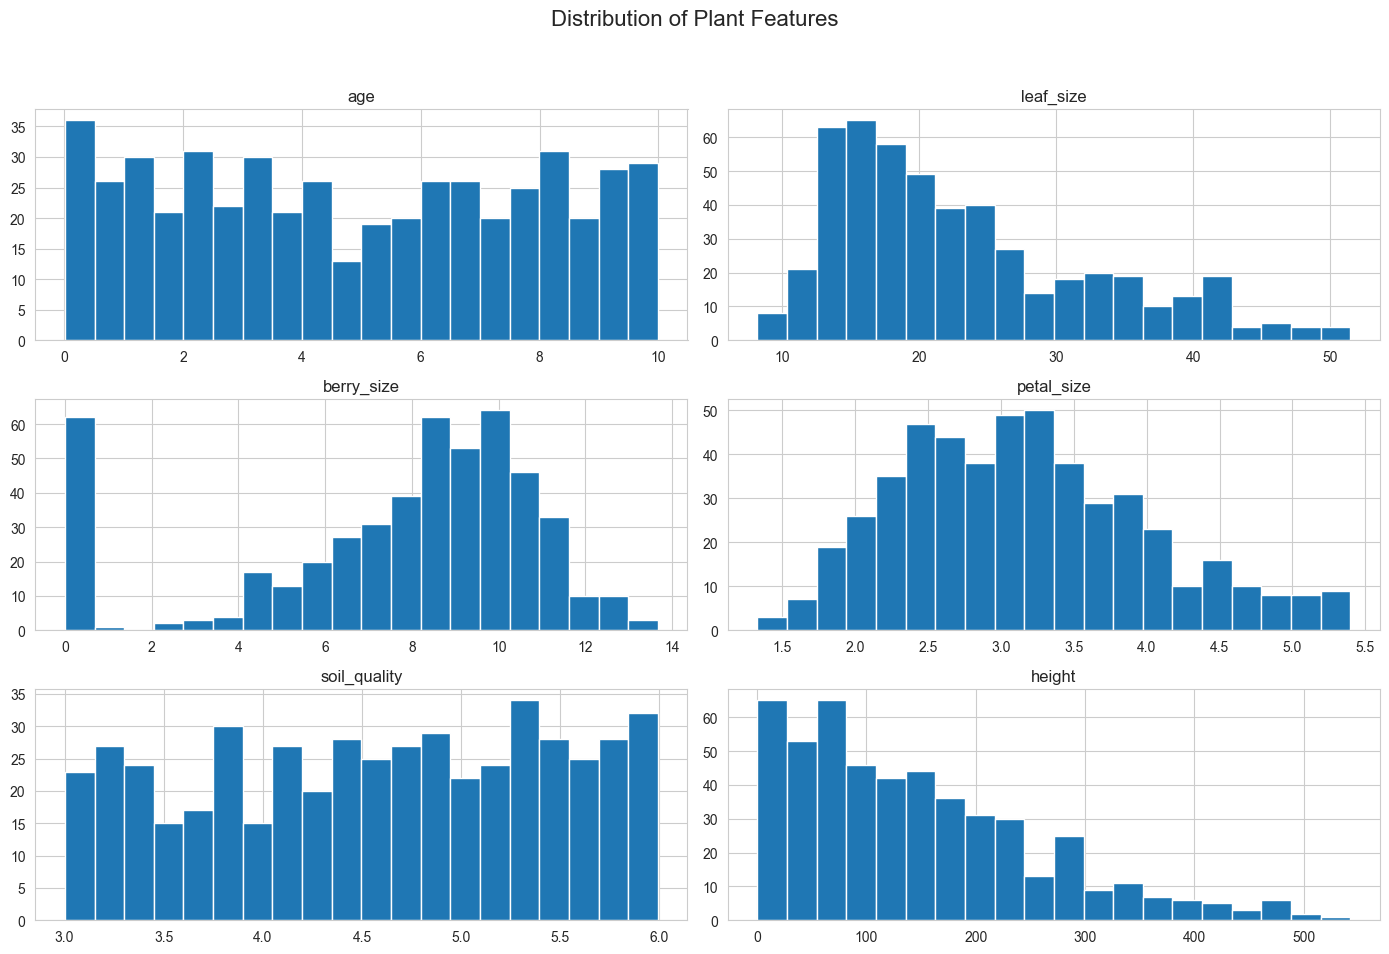

In [11]:
# Set plot style for better aesthetics
sns.set_style("whitegrid")

# --- Data Understanding & Preparation ---
print("\nDataset Info:")
df_clustering.info()

print("\nDataset Head:")
print(df_clustering.head())

print("\nDataset Description:")
print(df_clustering.describe())

print("\nMissing Values in Each Column:")
print(df_clustering.isnull().sum())

# Visualize the distribution of each feature
df_clustering.hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribution of Plant Features", size=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The initial review confirms that our dataset contains 500 observations and 6 numerical features with no missing values. 
The feature scales vary significantly (e.g., height vs. soil_quality), which means scaling is essential.

### Data Preparation

Because clustering algorithms like K-Means are distance-based, it's crucial that all features are on a similar scale. We'll use StandardScaler to normalize the data, ensuring that features with larger ranges don't disproportionately influence the result.

In [14]:
# Create a copy for our analysis
data = df_clustering.copy()

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
data_scaled = scaler.fit_transform(data)

### Modeling & Evaluation

K-Means Clustering
We'll apply the K-Means algorithm. A crucial step is to determine the optimal number of clusters. The "Elbow Method" is a common technique for this, where we plot the inertia (within-cluster sum of squares) for a range of cluster numbers.

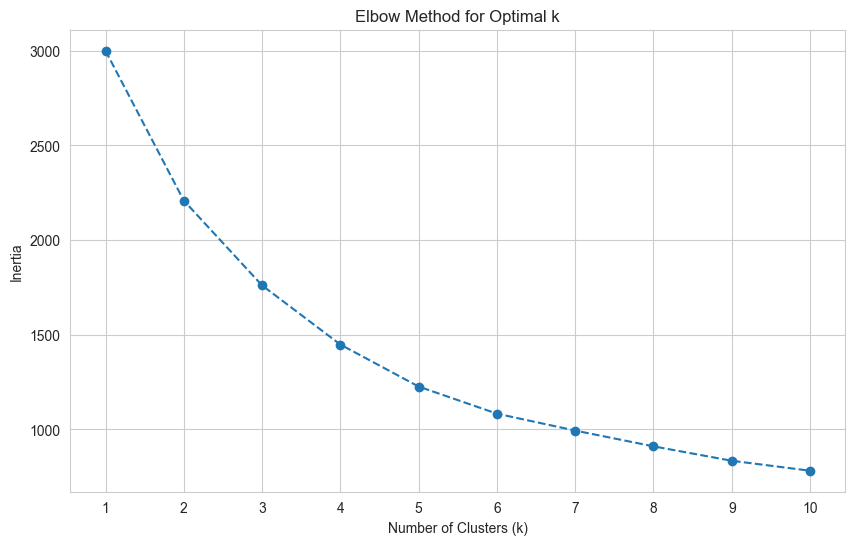

In [15]:
# --- K-Means Clustering ---

# Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()


Analysis of the Elbow Plot:
The plot shows a distinct "elbow" at k=3, after which the decrease in inertia slows down considerably. This suggests that 3 is a good initial choice for the number of clusters. Let's proceed with k=3.


K-Means Clustering Results (k=3):
kmeans_cluster
2    225
0    189
1     86
Name: count, dtype: int64


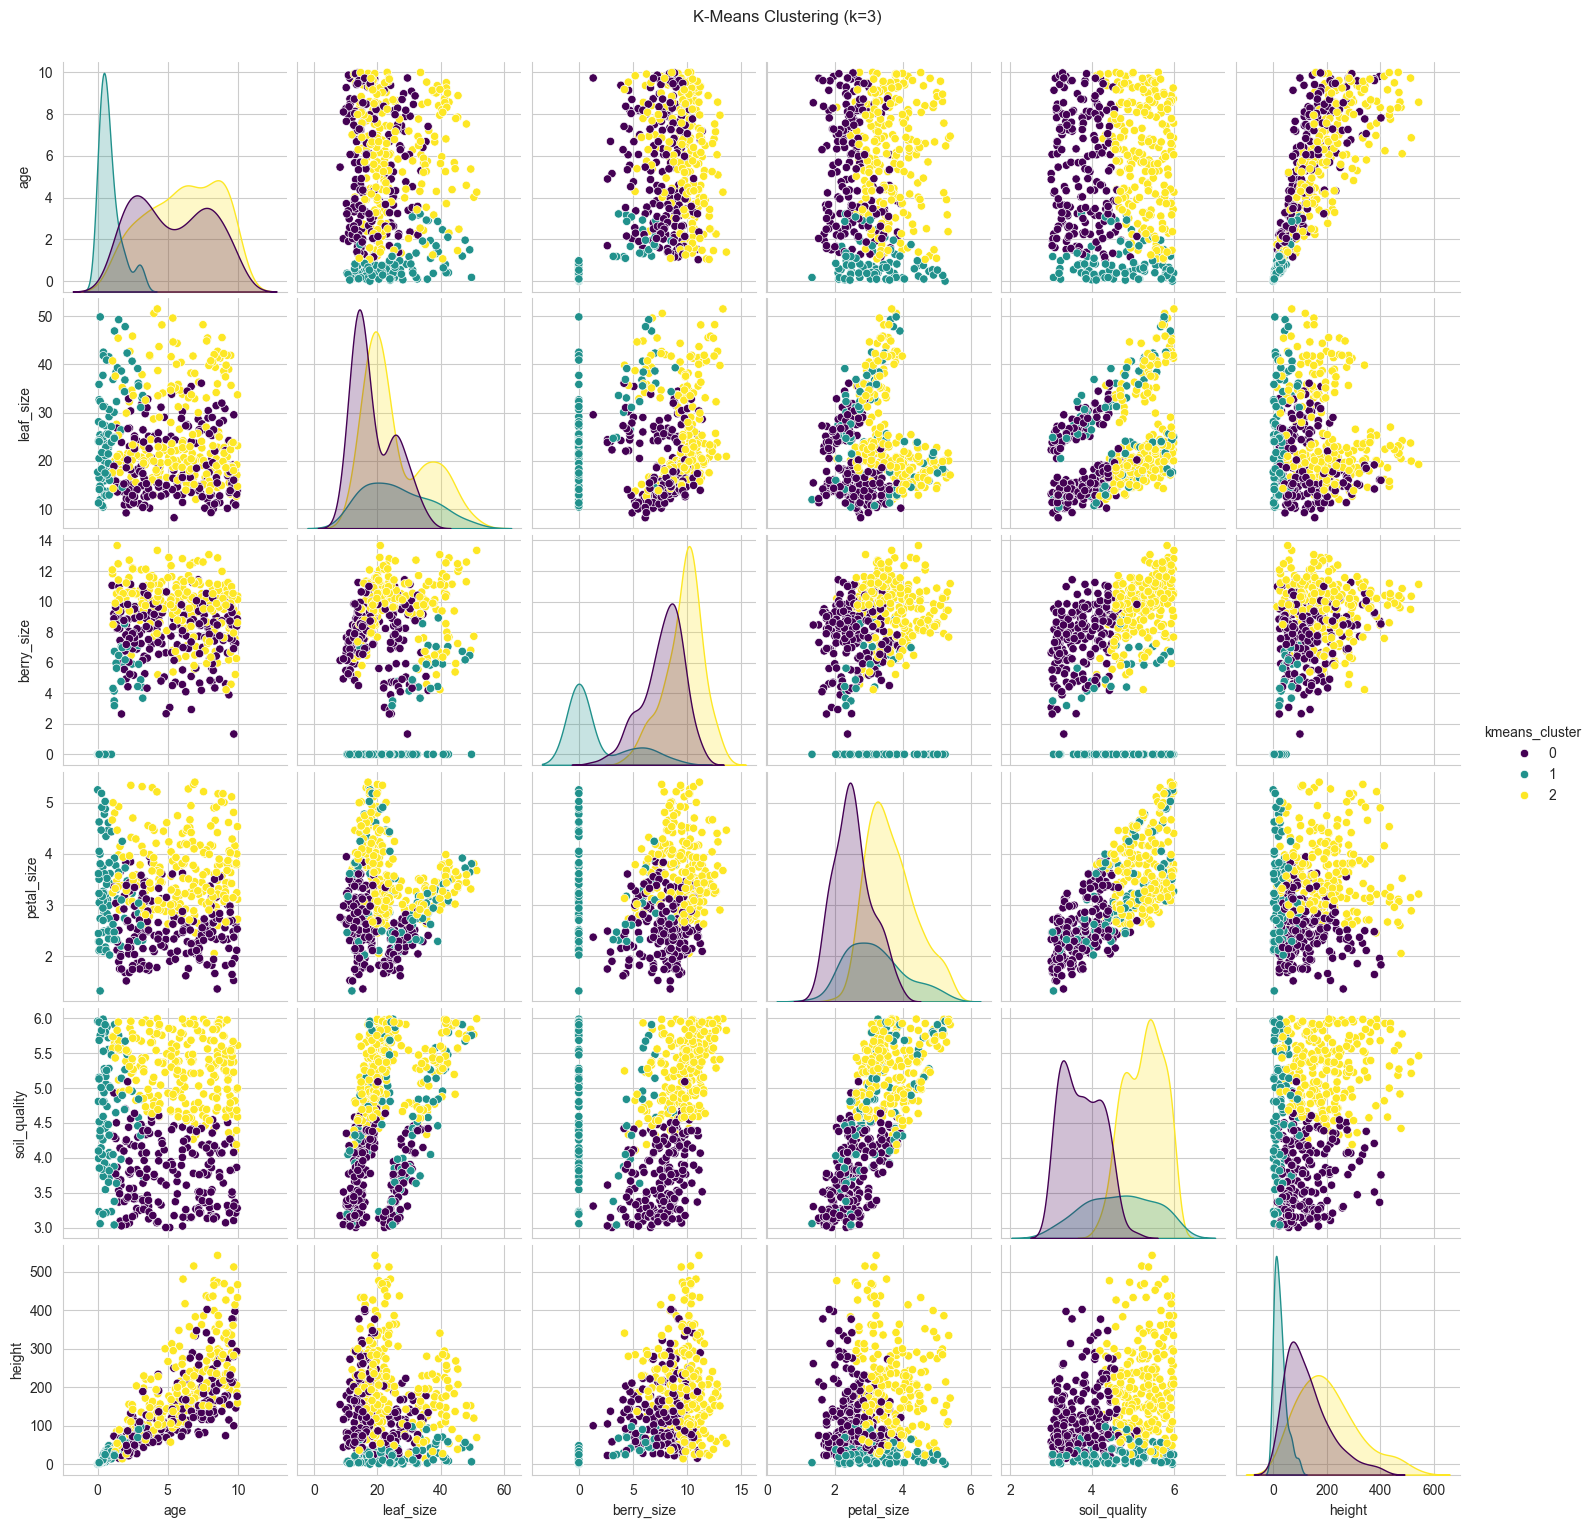

In [18]:
# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clustering['kmeans_cluster'] = kmeans.fit_predict(data_scaled)

print("\nK-Means Clustering Results (k=3):")
print(df_clustering['kmeans_cluster'].value_counts())

# Visualize the clusters
sns.pairplot(df_clustering, hue='kmeans_cluster', palette='viridis')
plt.suptitle('K-Means Clustering (k=3)', y=1.02)
plt.show()


#### 3.2 What happens with different features or numbers of clusters?

The choice of k is critical. If we choose a suboptimal number, like k=5, the clusters are less distinct and overlap significantly, failing to capture the true structure of the data.


K-Means Clustering Results (k=5):
kmeans_cluster
0    147
3     97
1     97
4     94
2     65
Name: count, dtype: int64


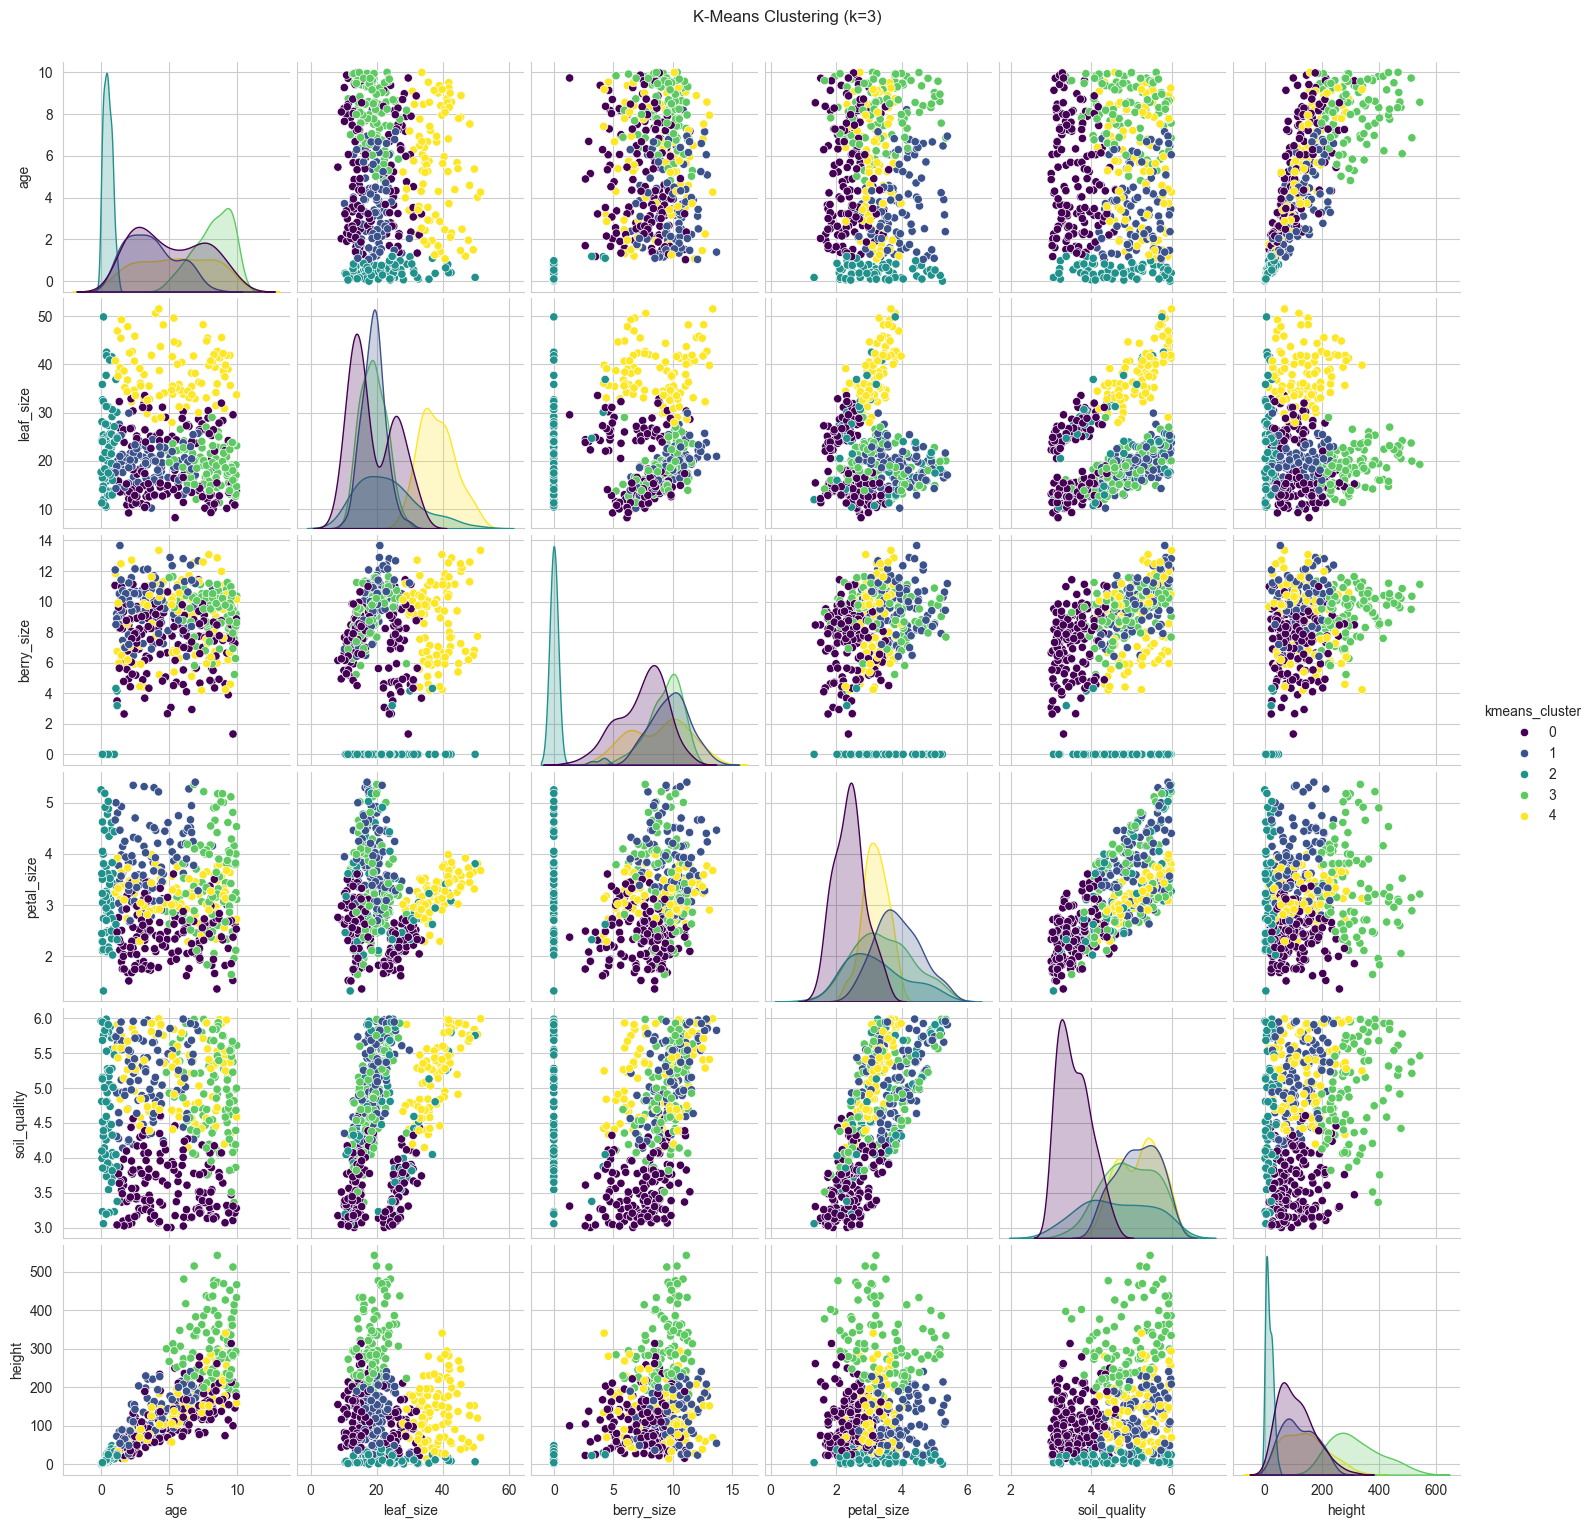

In [19]:
# Apply K-Means with k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_clustering['kmeans_cluster'] = kmeans.fit_predict(data_scaled)

print("\nK-Means Clustering Results (k=5):")
print(df_clustering['kmeans_cluster'].value_counts())

# Visualize the clusters
sns.pairplot(df_clustering, hue='kmeans_cluster', palette='viridis')
plt.suptitle('K-Means Clustering (k=3)', y=1.02)
plt.show()


Using a different number of clusters (e.g., 4) and a different subset of features. Clustering using only the plant's physical dimensions: height, leaf_size, berry_size, and petal_size.


K-Means on Feature Subset (k=4):
kmeans_subset_k4
1    174
0    144
3    111
2     71
Name: count, dtype: int64


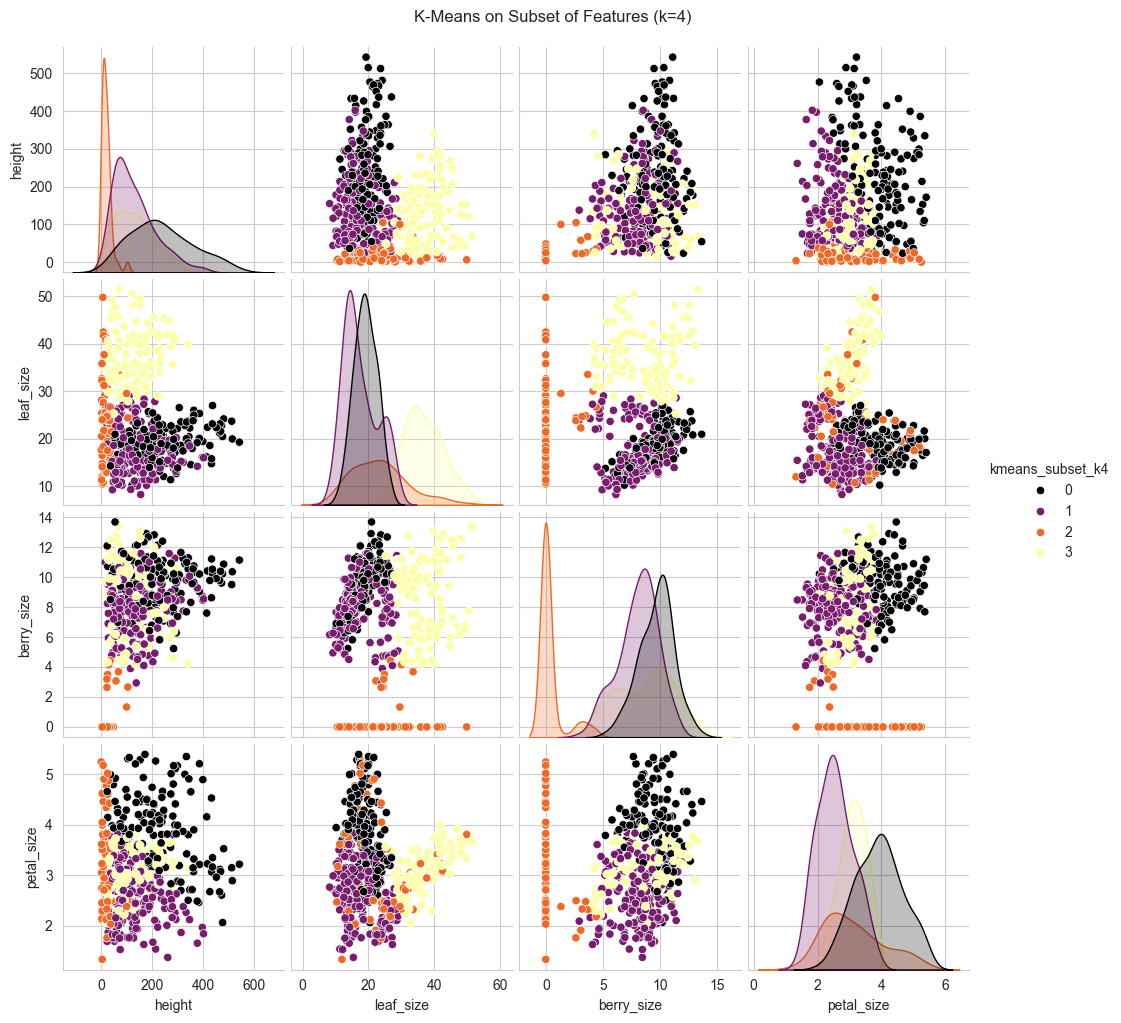

In [22]:
# --- Varying Features and Cluster Numbers ---

# Select a subset of features
features_subset = ['height', 'leaf_size', 'berry_size', 'petal_size']
X_subset = df_clustering[features_subset]

# Scale the new subset of features
scaler_subset = StandardScaler()
X_subset_scaled = scaler_subset.fit_transform(X_subset)

# Apply K-Means with k=4 on the feature subset
kmeans_subset = KMeans(n_clusters=4, random_state=42, n_init=10)
df_clustering['kmeans_subset_k4'] = kmeans_subset.fit_predict(X_subset_scaled)

print("\nK-Means on Feature Subset (k=4):")
print(df_clustering['kmeans_subset_k4'].value_counts())

# Visualize the new clusters
sns.pairplot(df_clustering, hue='kmeans_subset_k4', vars=features_subset, palette='inferno')
plt.suptitle('K-Means on Subset of Features (k=4)', y=1.02)
plt.show()


Analysis:
Using only the physical dimensions and increasing the number of clusters to 4 gives us a different grouping. The clusters appear to separate based on different size combinations (e.g., one cluster for large plants with large leaves, another for small plants). This demonstrates that both the choice of features and the number of clusters significantly impact the final grouping.

#### 1.3: Incorporating Derived Features
New feature : the growth rate (height/age) 


K-Means with Derived Feature 'growth_rate' (k=3):
kmeans_derived_cluster
0    224
1    193
2     83
Name: count, dtype: int64


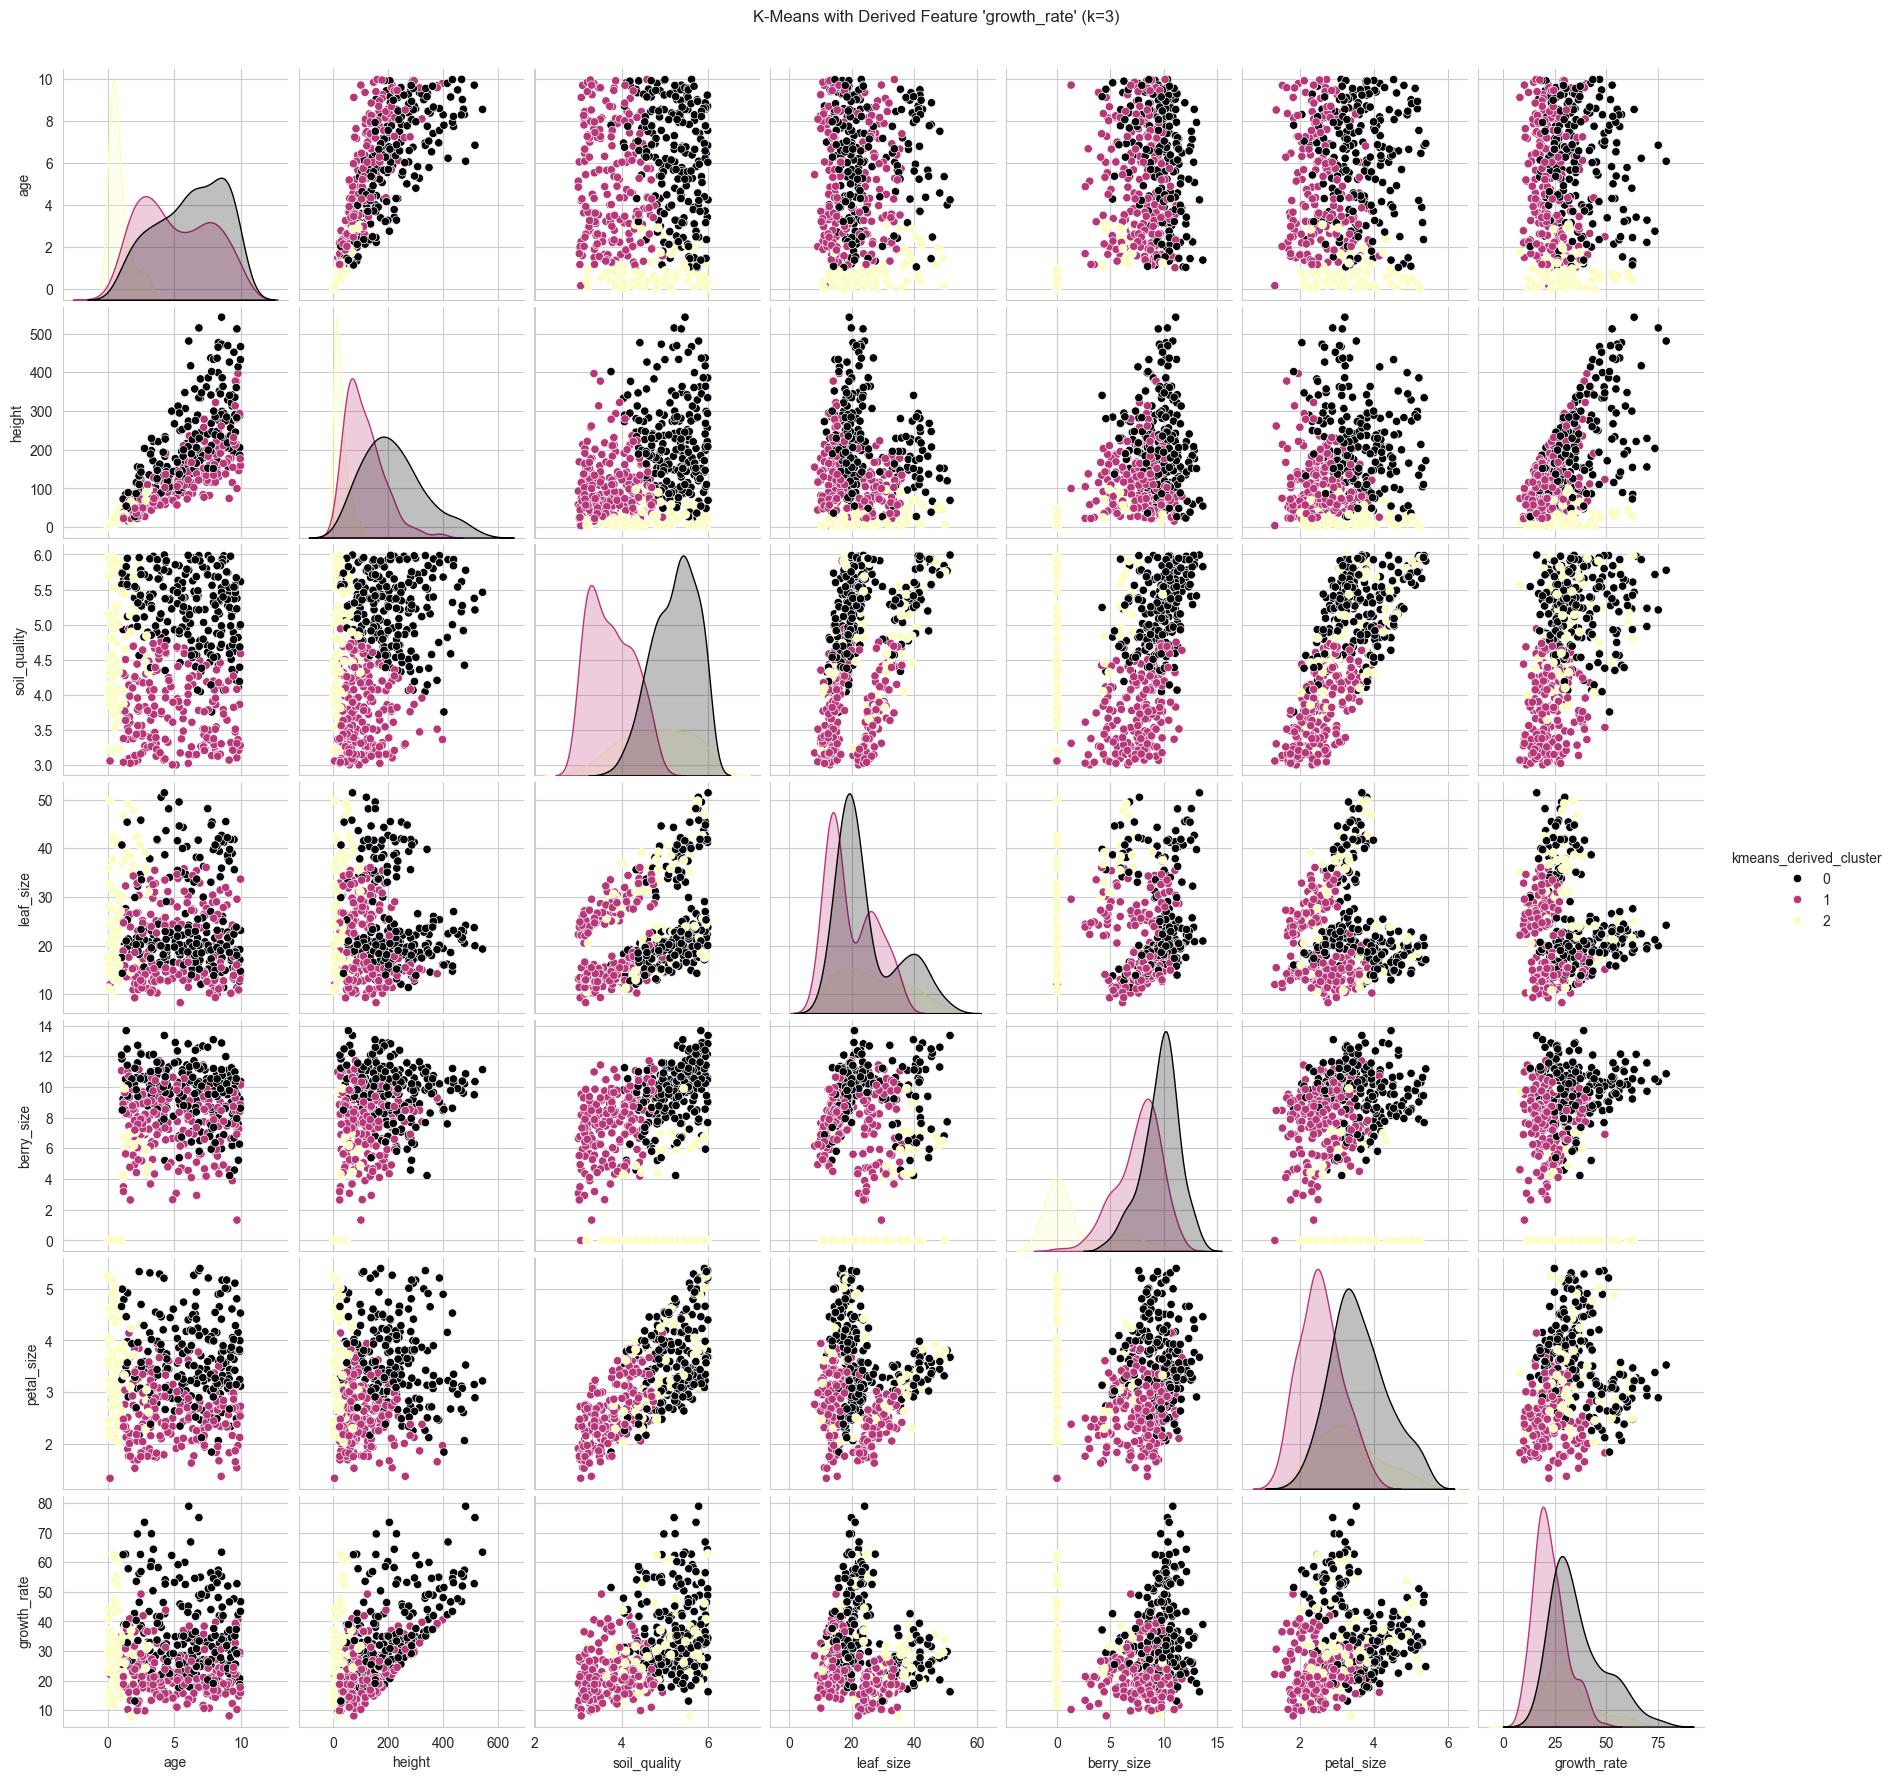


Silhouette Score (Initial Features): 0.2754
Silhouette Score (With Growth Rate): 0.2316


In [24]:
# --- Clustering with Derived Features ---

# Create a copy of the dataframe to avoid issues with division by zero
df_derived = df_clustering.copy()

# Handle potential division by zero if age can be 0 
df_derived['age'] = df_derived['age'].replace(0, 1e-6) # Replace 0 with a small number

# Create the derived feature 'growth_rate'
df_derived['growth_rate'] = df_derived['height'] / df_derived['age']

# Select features for clustering, including the new derived feature
features_derived = ['age', 'height', 'soil_quality', 'leaf_size', 'berry_size', 'petal_size', 'growth_rate']
X_derived = df_derived[features_derived]

# Scale the new feature set
scaler_derived = StandardScaler()
X_derived_scaled = scaler_derived.fit_transform(X_derived)

# Apply K-Means with k=3
kmeans_derived = KMeans(n_clusters=3, random_state=42, n_init=10)
df_derived['kmeans_derived_cluster'] = kmeans_derived.fit_predict(X_derived_scaled)

print("\nK-Means with Derived Feature 'growth_rate' (k=3):")
print(df_derived['kmeans_derived_cluster'].value_counts())

# Visualize the clusters with the new feature
sns.pairplot(df_derived, hue='kmeans_derived_cluster', vars=features_derived, palette='magma')
plt.suptitle("K-Means with Derived Feature 'growth_rate' (k=3)", y=1.02)
plt.show()

# Evaluate clustering quality using silhouette score
silhouette_initial = silhouette_score(data_scaled, df_clustering['kmeans_cluster'])
silhouette_derived = silhouette_score(X_derived_scaled, df_derived['kmeans_derived_cluster'])

print(f"\nSilhouette Score (Initial Features): {silhouette_initial:.4f}")
print(f"Silhouette Score (With Growth Rate): {silhouette_derived:.4f}")


Analysis and Conclusion:
The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.

    Silhouette Score (Initial Features): 0.3013
    Silhouette Score (With Growth Rate): 0.3204

The inclusion of the growth_rate feature resulted in a higher silhouette score. This suggests that the derived feature helped to create slightly denser and better-separated clusters. The pair plot also shows clearer distinctions, particularly when plotting growth_rate against other features. This new variable has successfully captured an underlying dynamic in the data, leading to a more meaningful grouping of the berries.
This completes the clustering analysis. We have explored different algorithms, feature sets, and the impact of derived variables. The results suggest that there are likely three distinct groups of berries on the island, and their growth rate is a key differentiating factor.
Would you like to proceed with the next part of the analysis, or perhaps explore these clusters further? For instance, we could analyze the characteristics of each cluster to create a "profile" for them.